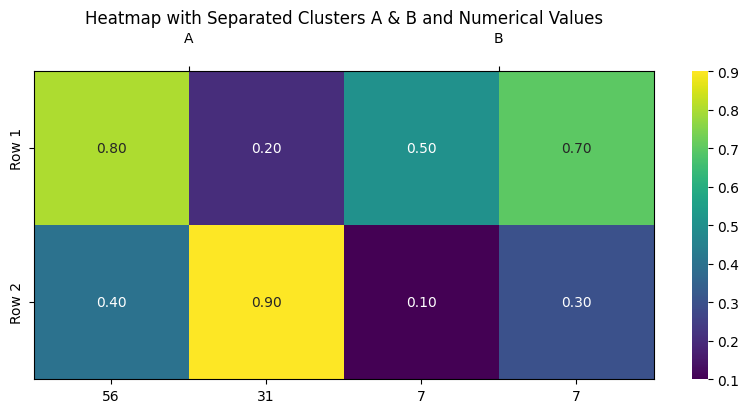

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Example data for the heatmap
data = np.array([[0.8, 0.2, 0.5, 0.7],
                 [0.4, 0.9, 0.1, 0.3]])

# Creating a new figure for the heatmap
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the heatmap
sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis', ax=ax)

# Setting x and y labels
ax.set_xticklabels([''] * data.shape[1])  # Empty x labels
ax.set_yticklabels(['Row 1', 'Row 2'])

# Creating a secondary x-axis to show clusters
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())  # Ensure the secondary x-axis has the same limits as the primary
ax2.set_xticks([1, 3])  # Set the ticks to the middle of each cluster
ax2.set_xticklabels(['A', 'B'])  # Label each cluster
ax2.tick_params(axis='x', which='major', pad=15)  # Move the cluster labels down

# Adding numerical values as primary x-tick labels
numerical_values = [f"{np.random.randint(1, 100)}" for _ in range(data.shape[1])]
ax.set_xticks(np.arange(len(numerical_values)) + 0.5)
ax.set_xticklabels(numerical_values)

plt.title('Heatmap with Separated Clusters A & B and Numerical Values')
plt.show()


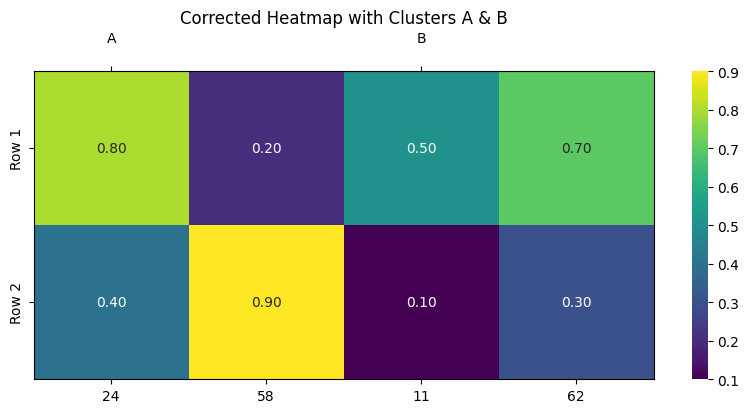

In [6]:
# Correcting the approach to represent clusters A and B as separate small cells on the heatmap

# Creating a new figure for the heatmap
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the heatmap
sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis', ax=ax)

# Setting x and y labels
ax.set_xticklabels([''] * data.shape[1])  # Empty x labels
ax.set_yticklabels(['Row 1', 'Row 2'])

# Creating a secondary x-axis to show clusters as small cells
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())  # Ensure the secondary x-axis has the same limits as the primary

# Positioning the cluster ticks more precisely
cluster_positions = [(data.shape[1]/4)-0.5, (3*data.shape[1]/4)-0.5]
ax2.set_xticks(cluster_positions)  # Position the cluster labels correctly
ax2.set_xticklabels(['A', 'B'])  # Label each cluster
ax2.tick_params(axis='x', which='major', pad=15)  # Move the cluster labels down

# Adding numerical values as primary x-tick labels
numerical_values = [f"{np.random.randint(1, 100)}" for _ in range(data.shape[1])]
ax.set_xticks(np.arange(len(numerical_values)) + 0.5)
ax.set_xticklabels(numerical_values)

plt.title('Corrected Heatmap with Clusters A & B')
plt.show()


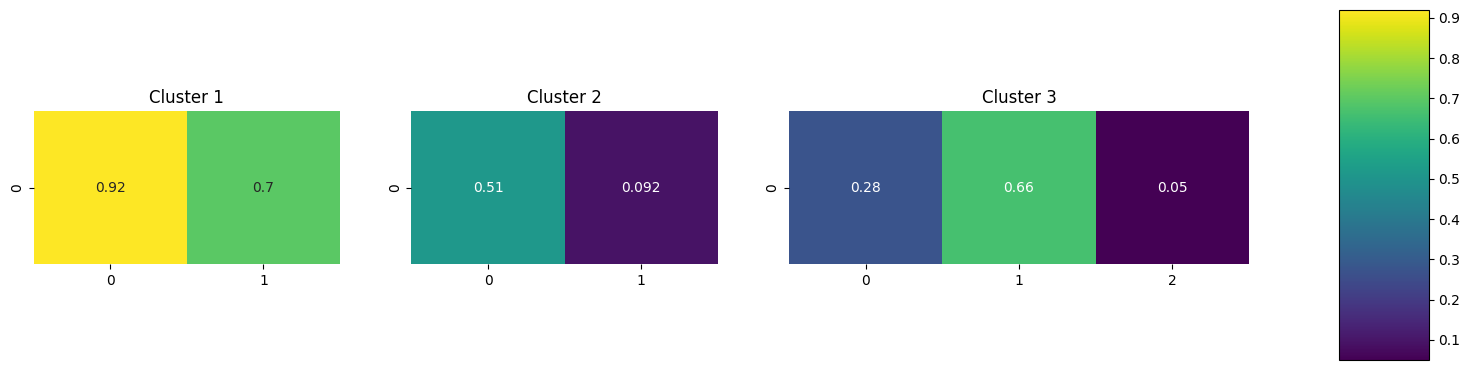

In [14]:
# Adjusting the generation of random data and plotting logic to match the new sizes of heatmaps (1x2, 1x2, 1x3)

# Generate random data for the heatmaps with the specific sizes
data_cluster_1 = np.random.rand(2).reshape(1, 2)  # For cluster 1
data_cluster_2 = np.random.rand(2).reshape(1, 2)  # For cluster 2
data_cluster_3 = np.random.rand(3).reshape(1, 3)  # For cluster 3

# Create a figure to hold the custom-sized heatmaps

# Plot each cluster's heatmap

# Redefining the plotting strategy to have a single shared colorbar for all the plots
# This time, we will normalize the data scale across all heatmaps to ensure the colorbar is accurately representing all values.

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Creating a new figure for the adjusted heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 2, 3]})

# Setting the colormap
cmap = "viridis"

# Normalizing the data scale across all heatmaps
norm = plt.Normalize(vmin=min(data_cluster_1.min(), data_cluster_2.min(), data_cluster_3.min()), vmax=max(data_cluster_1.max(), data_cluster_2.max(), data_cluster_3.max()))

# Function to draw each heatmap with a shared normalization but without adding a colorbar directly
def draw_heatmap_with_shared_cbar(data, ax, title):
    sns.heatmap(data, ax=ax, square=True, annot=True, cmap=cmap, norm=norm, cbar = False)
    ax.set_title(title)

# Drawing the heatmaps
draw_heatmap_with_shared_cbar(data_cluster_1, axs[0], "Cluster 1")
draw_heatmap_with_shared_cbar(data_cluster_2, axs[1], "Cluster 2")
draw_heatmap_with_shared_cbar(data_cluster_3, axs[2], "Cluster 3")

# Adding a single shared colorbar to the right of the last plot
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

plt.show()
